# Diabetes prediction
## Team: Kayahan Kaya, Magnus Karlson, Ekaterina Sedykh

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv("diabetes.csv")
print(data.shape)
data.head()

(15251, 9)


,Glucose Before fasting,Glucose Anytime,Age,Sex,Blood Pressure,Family member with Diabetes past or present,BMI,Pregnancies,percentage of occuring diabetes
0,153.0,225.0,57.0,Female,0.0,0.0,18.0,1.0,69.50
1,156.0,211.0,63.0,Male,0.0,1.0,17.0,0.0,69.25
2,85.0,139.0,60.0,Male,0.0,0.0,18.0,0.0,14.50
3,126.0,149.0,40.0,Male,1.0,0.0,28.0,0.0,62.00
4,117.0,156.0,46.0,Male,1.0,1.0,29.0,0.0,52.25


In [3]:
data.describe()

,Glucose Before fasting,Glucose Anytime,Age,Blood Pressure,Family member with Diabetes past or present,BMI,Pregnancies,percentage of occuring diabetes
count,15231.000000,15233.000000,15223.000000,15222.000000,15224.000000,15238.000000,15237.000000,15251.000000
mean,129.909855,190.399002,44.095382,0.499869,0.506043,26.953603,0.249262,51.622828
std,29.290305,64.141917,15.268833,0.500016,0.499980,7.745629,0.432600,16.924352
min,80.000000,80.000000,18.000000,0.000000,0.000000,14.000000,0.000000,3.500000
25%,104.000000,134.000000,31.000000,0.000000,0.000000,20.000000,0.000000,40.000000
50%,130.000000,191.000000,44.000000,0.000000,1.000000,27.000000,0.000000,52.250000
75%,155.000000,246.000000,57.000000,1.000000,1.000000,34.000000,0.000000,64.500000
max,180.000000,300.000000,70.000000,1.000000,1.000000,40.000000,1.000000,90.000000


In [4]:
data.columns


Index(['Glucose Before fasting', 'Glucose Anytime', 'Age', 'Sex',
       'Blood Pressure', 'Family member with Diabetes past or present', 'BMI',
       'Pregnancies', 'percentage of occuring diabetes'],
      dtype='object')

In [5]:
data.nunique()

Glucose Before fasting                         101
Glucose Anytime                                221
Age                                             53
Sex                                              2
Blood Pressure                                   2
Family member with Diabetes past or present      2
BMI                                             27
Pregnancies                                      2
percentage of occuring diabetes                347
dtype: int64

# Cleaning Data

In [6]:
data.dropna(inplace=True) 
data.isnull().sum()

Glucose Before fasting                         0
Glucose Anytime                                0
Age                                            0
Sex                                            0
Blood Pressure                                 0
Family member with Diabetes past or present    0
BMI                                            0
Pregnancies                                    0
percentage of occuring diabetes                0
dtype: int64

# Visualisation of Data

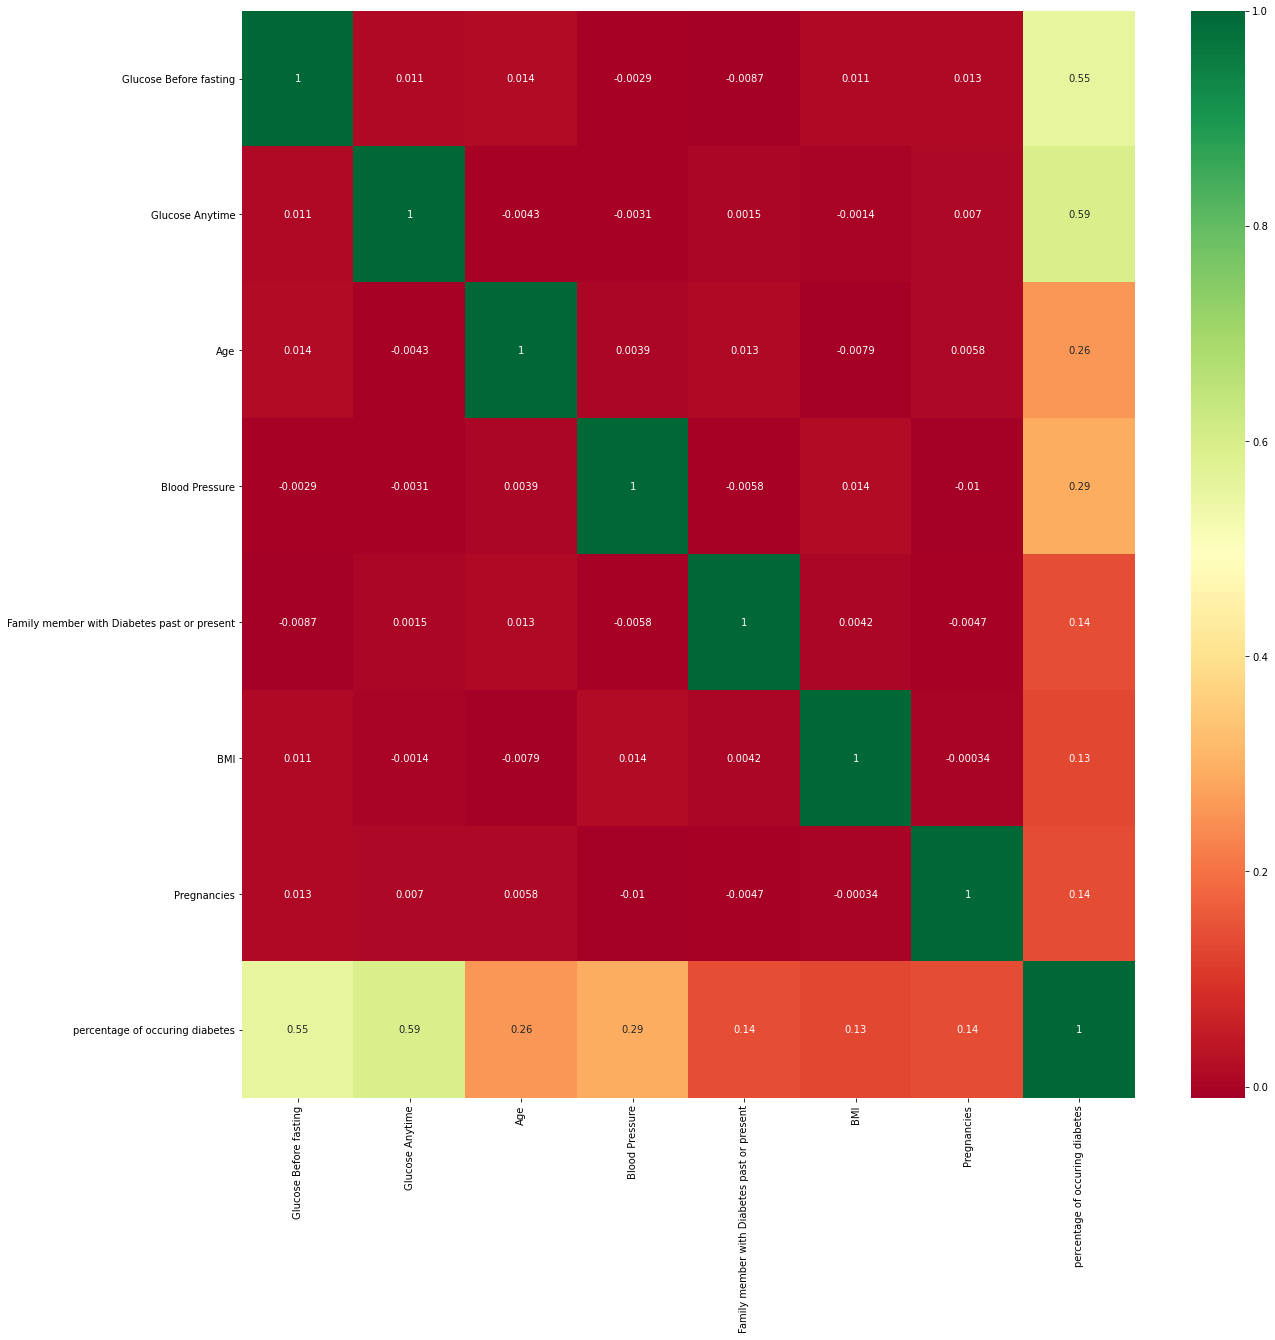

In [7]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

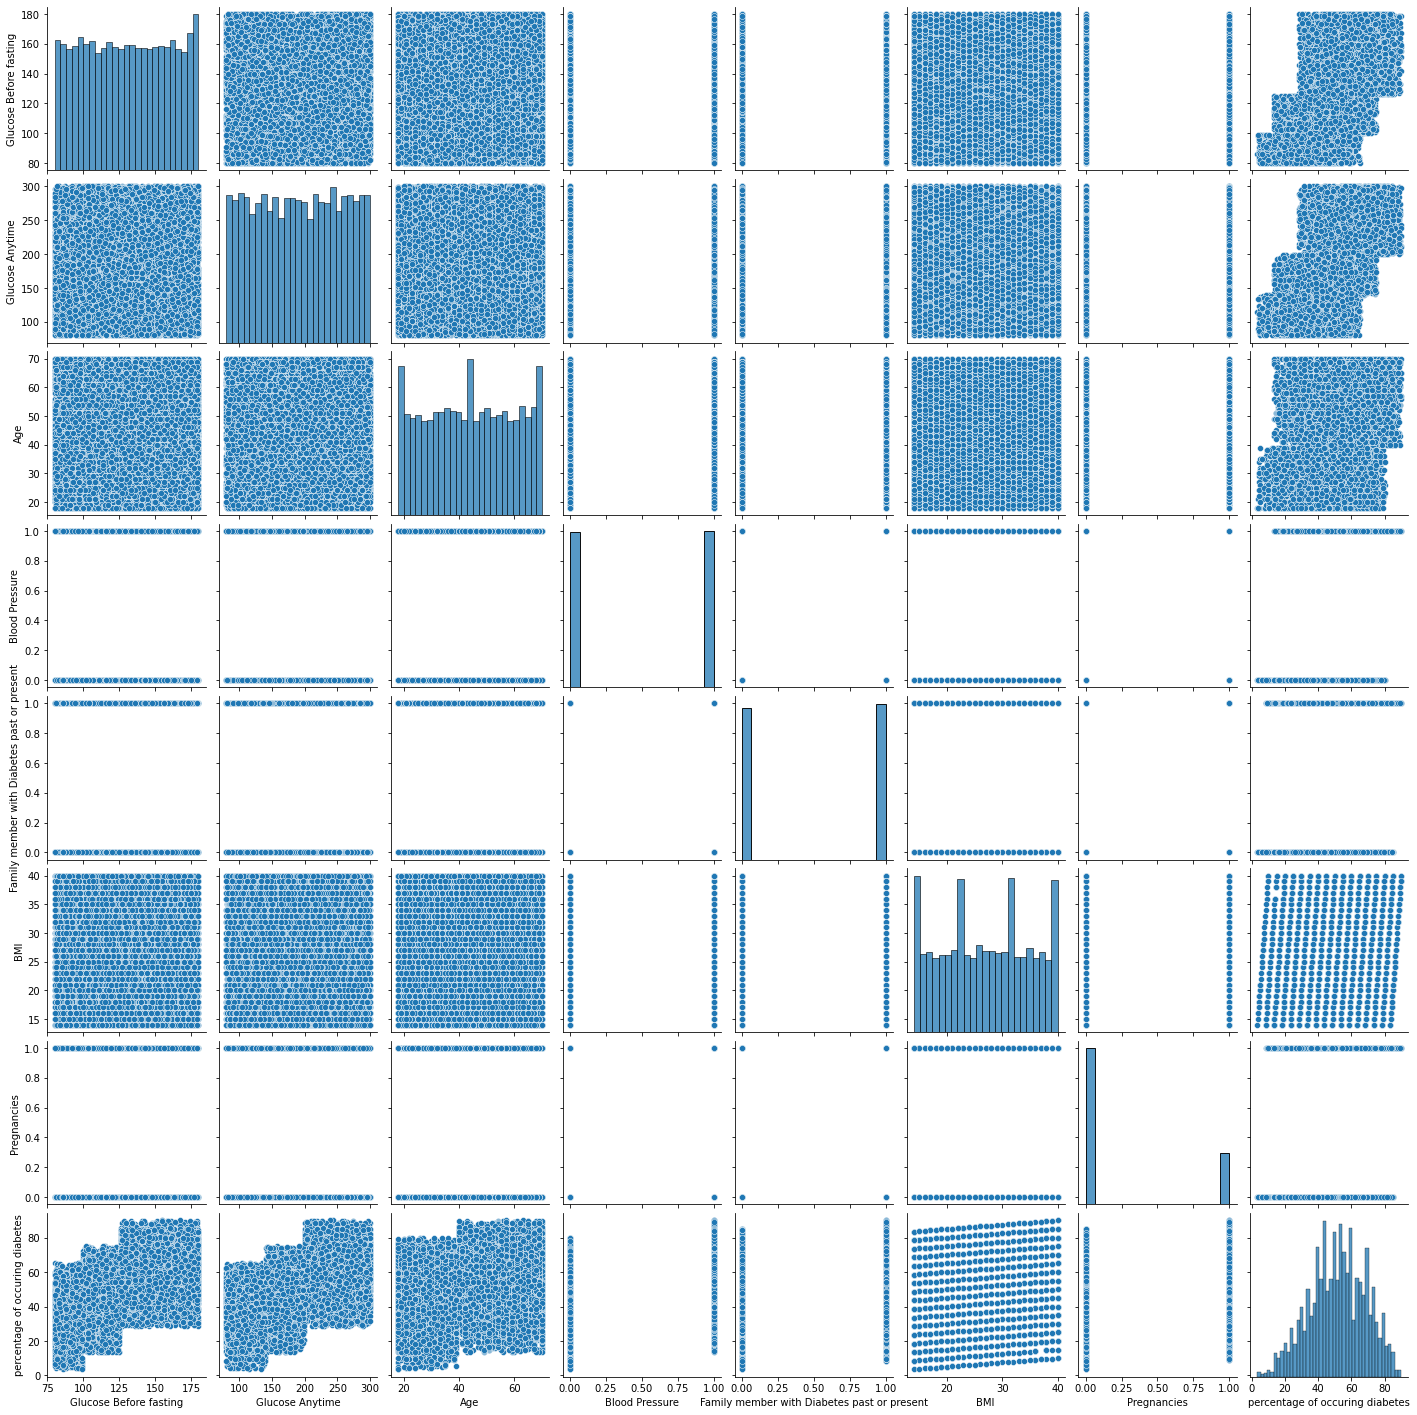

In [8]:
sns.pairplot(data)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

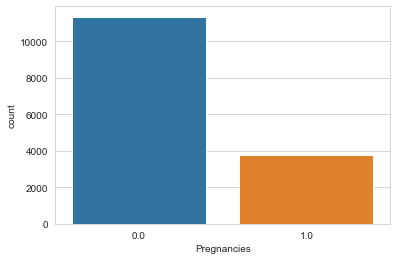

In [9]:
sns.set_style('whitegrid')
sns.countplot(x="Pregnancies",data=data)

C:\Users\Magnus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='percentage of occuring diabetes', ylabel='Density'>

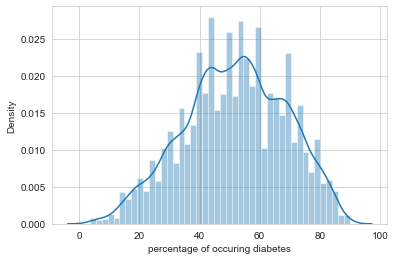

In [10]:
sns.distplot(data['percentage of occuring diabetes'])

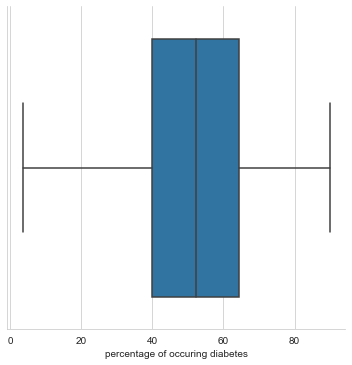

In [11]:
sns.catplot(x='percentage of occuring diabetes',kind='box',data=data)

In [12]:
cdata = data.copy()

# Let's convert percentage of diabetes column to binary format.
#cdata['diabetes'] = (cdata["percentage of occuring diabetes"] > 50).astype(int)
#cdata.drop("percentage of occuring diabetes", axis=1, inplace=True)

# Let's check our data is whether balanced or not
#print(np.sum(cdata["diabetes"] == 1), np.sum(cdata["diabetes"] == 0))

In [13]:
# Convert user sex into binary
cdata.Sex = cdata.Sex.map(dict(Male=1, Female=0))
cdata

,Glucose Before fasting,Glucose Anytime,Age,Sex,Blood Pressure,Family member with Diabetes past or present,BMI,Pregnancies,percentage of occuring diabetes
0,153.0,225.0,57.0,0,0.0,0.0,18.0,1.0,69.50
1,156.0,211.0,63.0,1,0.0,1.0,17.0,0.0,69.25
2,85.0,139.0,60.0,1,0.0,0.0,18.0,0.0,14.50
3,126.0,149.0,40.0,1,1.0,0.0,28.0,0.0,62.00
4,117.0,156.0,46.0,1,1.0,1.0,29.0,0.0,52.25
...,...,...,...,...,...,...,...,...,...
15246,116.0,265.0,54.0,1,1.0,0.0,29.0,0.0,62.25
15247,86.0,253.0,62.0,0,1.0,0.0,40.0,0.0,55.00
15248,148.0,136.0,28.0,1,1.0,1.0,22.0,0.0,45.50
15249,171.0,295.0,64.0,0,0.0,0.0,28.0,0.0,67.00


In [22]:
# different models
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import PoissonRegressor

from keras.layers import Dense, Input, BatchNormalization
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

def SequentialModel1(inputshape):
    mdl = Sequential() 
    mdl.add(Dense(4, activation="sigmoid", input_shape=(inputshape,)))
    mdl.add(Dense(1, activation="sigmoid"))
    mdl.compile(loss="mean_squared_error", optimizer="sgd")
    return mdl

def SequentialModel2(inputshape):
    mdl = Sequential()

    mdl.add(Dense(32, activation="tanh", input_shape=(inputshape,)))
    mdl.add(BatchNormalization())
    mdl.add(Dense(16, activation="selu"))
    mdl.add(BatchNormalization())
    mdl.add(Dense(8, activation="linear"))
    mdl.add(Dense(1, activation="linear"))
    
    mdl.compile(loss="mean_squared_error", optimizer="sgd")
    return mdl

def SequentialModel3(inputshape):
    mdl = Sequential()

    mdl.add(Dense(32, activation="tanh", input_shape=(inputshape,)))
    mdl.add(BatchNormalization())
    mdl.add(Dense(16, activation="selu"))
    mdl.add(BatchNormalization())
    mdl.add(Dense(8, activation="linear"))
    mdl.add(Dense(1, activation="linear"))
    
    mdl.compile(loss="mean_squared_error", optimizer="sgd")
    return mdl

def SequentialModel4(inputshape):
    mdl = Sequential()

    mdl.add(Dense(64, activation="tanh", input_shape=(inputshape,)))
    mdl.add(BatchNormalization())
    mdl.add(Dense(32, activation="tanh"))
    mdl.add(BatchNormalization())
    mdl.add(Dense(16, activation="selu"))
    mdl.add(BatchNormalization())
    mdl.add(Dense(7, activation="linear"))
    mdl.add(Dense(1, activation="linear"))

    mdl.compile(loss='mean_squared_error', optimizer="sgd")
    return mdl

models = {
    "LinearRegression": LinearRegression(),
    "RidgeRegression": Ridge(),
    "LassoRegression": Lasso(),
    "PoissonRegressor": PoissonRegressor(),
    #"RandomForestClassifier": RandomForestClassifier(n_estimators=50,max_depth=75,random_state=30),
    #"KNeighborsClassifier": KNeighborsClassifier(),
    #"GaussianNB": GaussianNB(),
    #"LogisticRegression": LogisticRegression(),
}

models_neural = {
    "SequentialModel1": SequentialModel1,
    "SequentialModel2": SequentialModel2,
    "SequentialModel3": SequentialModel3,
    "SequentialModel4": SequentialModel4,
}

In [23]:
# Data preparation
from itertools import combinations
from sklearn.preprocessing import MinMaxScaler

#predicted_column = 'diabetes'
predicted_column = 'percentage of occuring diabetes'

# Data scaling between 0 & 1
columns = [x for x in cdata]
scaler = MinMaxScaler()
cdata[columns] = scaler.fit_transform(cdata[columns])


# Features & predicted split
data_features = cdata.drop(predicted_column, 1)
data_predicted = cdata[predicted_column]

# Features combinations generation
features = [x for x in data_features]
features_combs = []

for i in range(5, len(features)):
    features_combs.append([list(x) for x in combinations(features, i)])
    
# Prints out parameters
total = sum([len(x) for x in features_combs])
print("Max features {}, Total combinations {}".format(len(features), total))
print("Scaled features")
print(data_features.iloc[:3])
print(data_predicted.iloc[:3])

Max features 8, Total combinations 92
Scaled features
   Glucose Before fasting  Glucose Anytime       Age  Sex  Blood Pressure  \
0                    0.73         0.659091  0.750000  0.0             0.0   
1                    0.76         0.595455  0.865385  1.0             0.0   
2                    0.05         0.268182  0.807692  1.0             0.0   

   Family member with Diabetes past or present       BMI  Pregnancies  
0                                          0.0  0.153846          1.0  
1                                          1.0  0.115385          0.0  
2                                          0.0  0.153846          0.0  
0    0.763006
1    0.760116
2    0.127168
Name: percentage of occuring diabetes, dtype: float64


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splits data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(data_features, data_predicted, test_size=0.2, random_state=60)

# Find prediction result for given combination
def find_models_predictions(combination):
    results = []
    for desc, model in models.items():
        mdl = model.fit(X_train[combination], y_train)
        predictions = mdl.predict(X_test[combination])
        score = mean_squared_error(predictions, y_test)
        results.append((round(score, 4), desc, combination))
    return results   

default_results = []

# Goes through possible combinations
for combinations in features_combs:
    for combination in combinations:
        default_results.extend(find_models_predictions(combination))

print("Total combinations", len(default_results))

# Sorts results by MSE, lower the better
default_results.sort(key=lambda x: x[0])
for row in default_results[:10]:
    print(row)
    print()

Total combinations 368
(0.0055, 'LinearRegression', ['Glucose Before fasting', 'Glucose Anytime', 'Age', 'Blood Pressure', 'Family member with Diabetes past or present', 'BMI', 'Pregnancies'])

(0.0055, 'RidgeRegression', ['Glucose Before fasting', 'Glucose Anytime', 'Age', 'Blood Pressure', 'Family member with Diabetes past or present', 'BMI', 'Pregnancies'])

(0.0059, 'LinearRegression', ['Glucose Before fasting', 'Glucose Anytime', 'Age', 'Sex', 'Blood Pressure', 'Family member with Diabetes past or present', 'BMI'])

(0.0059, 'RidgeRegression', ['Glucose Before fasting', 'Glucose Anytime', 'Age', 'Sex', 'Blood Pressure', 'Family member with Diabetes past or present', 'BMI'])

(0.006, 'LinearRegression', ['Glucose Before fasting', 'Glucose Anytime', 'Age', 'Blood Pressure', 'Family member with Diabetes past or present', 'Pregnancies'])

(0.006, 'RidgeRegression', ['Glucose Before fasting', 'Glucose Anytime', 'Age', 'Blood Pressure', 'Family member with Diabetes past or present', 'Pr

In [ ]:
# Uses n best combinations for training neural network
models_combs = 5

# Now we will use best & worst combinations from the last exercise in the neural models
def find_neural_models_predictions(combination):
    results = []
    for desc, model in models_neural.items():
        print("Neural network model", desc)
        mdl = model(X_train[combination].shape[1])
        #mdl.summary()
        mdl.fit(X_train[combination], y_train, epochs=10, verbose=False)
        predictions = mdl.predict(X_test[combination])
        score = mean_squared_error(predictions, y_test)
        results.append((round(score, 4), desc, combination))
    return results

# Neural network with best combinations
for row in default_results[:models_combs].copy():
    default_results.extend(find_neural_models_predictions(row[2]))

print("Total combinations", len(default_results))

# Sorts results by MSE, lower the better
default_results.sort(key=lambda x: x[0])

Neural network model SequentialModel1
Neural network model SequentialModel2
Neural network model SequentialModel3
Neural network model SequentialModel4
Neural network model SequentialModel1
Neural network model SequentialModel2
Neural network model SequentialModel3
Neural network model SequentialModel4
Neural network model SequentialModel1
Neural network model SequentialModel2
Neural network model SequentialModel3
Neural network model SequentialModel4
Neural network model SequentialModel1
Neural network model SequentialModel2
Neural network model SequentialModel3
Neural network model SequentialModel4
Neural network model SequentialModel1
Neural network model SequentialModel2
Neural network model SequentialModel3


In [18]:
# Data analysis
# Finds best combination for every model
diagram_results = []
possible_models = [x[0] for x in models.items()] + [x[0] for x in models_neural.items()]
for desc in possible_models:
    for row in default_results:
        if desc == row[1]:
            diagram_results.append(row)
            break
            
# Every model best MSE
diagram_results.sort(key = lambda x : x[0])
print("Every Model Best MSE")
for i, row in enumerate(diagram_results):
    print(str(i+1), row)
    
top_models = 30
    
# Top models
print("Top MSE")
for i, row in enumerate(default_results[:top_models]):
    print(str(i+1), row)
    
# Top combinations
best_combs = []
for row in default_results[:top_models]:
    used = False
    for temp in best_combs:
        if temp[1] == row[2]:
            used = True
            break
    if not used:
        best_combs.append((row[0], row[2]))

print('Top Combinations')
for i, row in enumerate(best_combs):
    print(str(i+1), row)
    
diagram = {
    'every':{
        'models': [x[1] for x in diagram_results],
        'results': [x[0] for x in diagram_results]
    },
    'top':{
        'models': [x[1] + '_' + str(i+1) for i, x in enumerate(default_results[:top_models])],
        'results': [x[0] for x in default_results[:top_models]]
    },
    'combs':{
        'models': ['Combination_' + str(i+1) for i in range(len(best_combs))],
        'results': [x[0] for x in best_combs]
    }
}

Every Model Best MSE
1 (0.005, 'SequentialModel4', ['Glucose Before fasting', 'Glucose Anytime', 'Age', 'Blood Pressure', 'Family member with Diabetes past or present', 'Pregnancies'])
2 (0.0051, 'SequentialModel2', ['Glucose Before fasting', 'Glucose Anytime', 'Age', 'Blood Pressure', 'Family member with Diabetes past or present', 'BMI', 'Pregnancies'])
3 (0.0052, 'SequentialModel3', ['Glucose Before fasting', 'Glucose Anytime', 'Age', 'Blood Pressure', 'Family member with Diabetes past or present', 'BMI', 'Pregnancies'])
4 (0.0055, 'LinearRegression', ['Glucose Before fasting', 'Glucose Anytime', 'Age', 'Blood Pressure', 'Family member with Diabetes past or present', 'BMI', 'Pregnancies'])
5 (0.0055, 'RidgeRegression', ['Glucose Before fasting', 'Glucose Anytime', 'Age', 'Blood Pressure', 'Family member with Diabetes past or present', 'BMI', 'Pregnancies'])
6 (0.0291, 'SequentialModel1', ['Glucose Before fasting', 'Glucose Anytime', 'Age', 'Sex', 'Blood Pressure', 'Family member with

C:\Users\Magnus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.
C:\Users\Magnus\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\Magnus\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


<BarContainer object of 8 artists>

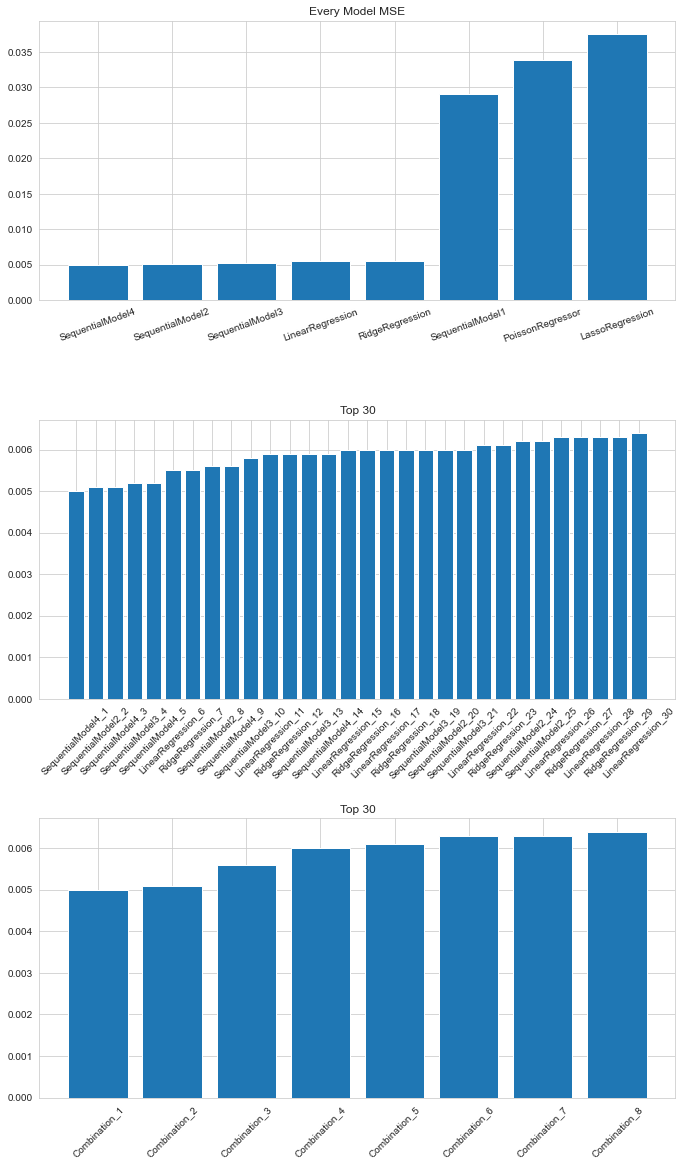

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,18))
fig.tight_layout(pad=10.0)
ax1.set_title("Every Model MSE")
ax1.set_xticklabels(diagram['every']['models'], rotation=20)
ax1.bar(diagram['every']['models'], diagram['every']['results'])

ax2.set_title(f"Top {top_models}")
ax2.set_xticklabels(diagram['top']['models'], rotation=45)
ax2.bar(diagram['top']['models'], diagram['top']['results'])

ax3.set_title(f"Top {top_models}")
ax3.set_xticklabels(diagram['combs']['models'], rotation=45)
ax3.bar(diagram['combs']['models'], diagram['combs']['results'])